<a href="https://colab.research.google.com/github/aescobar71/Proyecto-Final-Data-Science/blob/main/Entrega_6_%22Desafio_APIS_Andr%C3%A9sFelipe_EscobarM%22_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre: Andrés Felipe Escobar Mosquera**

**Comisión 49175**

**Data Science**


# **Sexta Entrega: Descarga de datos desde APIs públicas**

# **Gas Prices API**:
Genero la conexión a una base de datos que proporciona el costo de diferentes tipos de ombustible en USA:

In [ ]:
import json
import requests
import pandas as pd
import os

Genero el token de ingreso:
https://collectapi.com/auth

In [ ]:
token = '52YUAxyLF1Ngw9SUPg9K2e:5AsgjkuG270uqBFuhxE3yv'

Confirmo la url de donde se qdquieren los datos:

In [ ]:
url_base = "https://api.collectapi.com/gasPrice"

Generamos una url especifica de un recurso y utilziamos la libriaria os.path para unir dos rutas:




In [ ]:
allUsaPrice = "https://api.collectapi.com/gasPrice/allUsaPrice"

In [ ]:
url_consult = os.path.join(url_base,"allUsaPrice")
print (url_consult)

https://api.collectapi.com/gasPrice/allUsaPrice


# Request

In [ ]:
headers = {
    'content-type': "application/json",
    'authorization': f"apikey {token}"
    }

In [ ]:
requests.get(url_consult, headers=headers)

<Response [200]>

La respuesta indica que esta todo ok

# Response

In [ ]:
response = requests.get(url_consult, headers=headers)
type(response)

requests.models.Response

In [ ]:
content = response.content

Lo transformo con json a formato diccionario para poder trabajarlo

In [ ]:
content = json.loads(content)

In [ ]:
content

{'success': True,
 'result': [{'currency': 'usd',
   'name': 'Alaska',
   'gasoline': '3.821',
   'midGrade': '3.985',
   'premium': '4.212',
   'diesel': '3.888'},
  {'currency': 'usd',
   'name': 'Alabama',
   'gasoline': '3.181',
   'midGrade': '3.576',
   'premium': '3.964',
   'diesel': '3.843'},
  {'currency': 'usd',
   'name': 'Arkansas',
   'gasoline': '3.113',
   'midGrade': '3.486',
   'premium': '3.871',
   'diesel': '3.706'},
  {'currency': 'usd',
   'name': 'Arizona',
   'gasoline': '3.713',
   'midGrade': '4.028',
   'premium': '4.311',
   'diesel': '3.978'},
  {'currency': 'usd',
   'name': 'California',
   'gasoline': '4.917',
   'midGrade': '5.126',
   'premium': '5.291',
   'diesel': '5.381'},
  {'currency': 'usd',
   'name': 'Colorado',
   'gasoline': '3.065',
   'midGrade': '3.431',
   'premium': '3.745',
   'diesel': '3.753'},
  {'currency': 'usd',
   'name': 'Connecticut',
   'gasoline': '3.382',
   'midGrade': '3.894',
   'premium': '4.305',
   'diesel': '4.220'}

In [ ]:
print (type(content))

<class 'dict'>


Genero un DataFrame a partir de los datos bajo la clave 'result', para tenerlo en formato tabular, y poder analizarlo:

In [ ]:
df = pd.DataFrame(content['result'])

In [ ]:
df.head()

,currency,name,gasoline,midGrade,premium,diesel
0,usd,Alaska,3.821,3.985,4.212,3.888
1,usd,Alabama,3.181,3.576,3.964,3.843
2,usd,Arkansas,3.113,3.486,3.871,3.706
3,usd,Arizona,3.713,4.028,4.311,3.978
4,usd,California,4.917,5.126,5.291,5.381


In [ ]:
df.tail()

,currency,name,gasoline,midGrade,premium,diesel
46,usd,Vermont,3.318,3.811,4.230,4.198
47,usd,Washington,4.331,4.554,4.785,4.660
48,usd,Wisconsin,3.330,3.762,4.202,3.785
49,usd,West Virginia,3.363,3.735,4.093,3.979
50,usd,Wyoming,3.141,3.396,3.676,3.897


Grafiquemos el precio de combustibles por cada estado:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Convierto el DataFrame de formato ancho a largo usando 'pd.melt', para que Seaborn pueda entender fácilmente cómo dibujar cada línea de combustible como una serie separada

In [ ]:
df_long = pd.melt(df, id_vars=['name'], value_vars=['gasoline', 'midGrade', 'premium', 'diesel'], var_name='Fuel Type', value_name='Price')

Convierto los valores del precio a formato float, para asegurar que no haya error al graficar

In [ ]:
df_long['Price'] = df_long['Price'].astype(float)

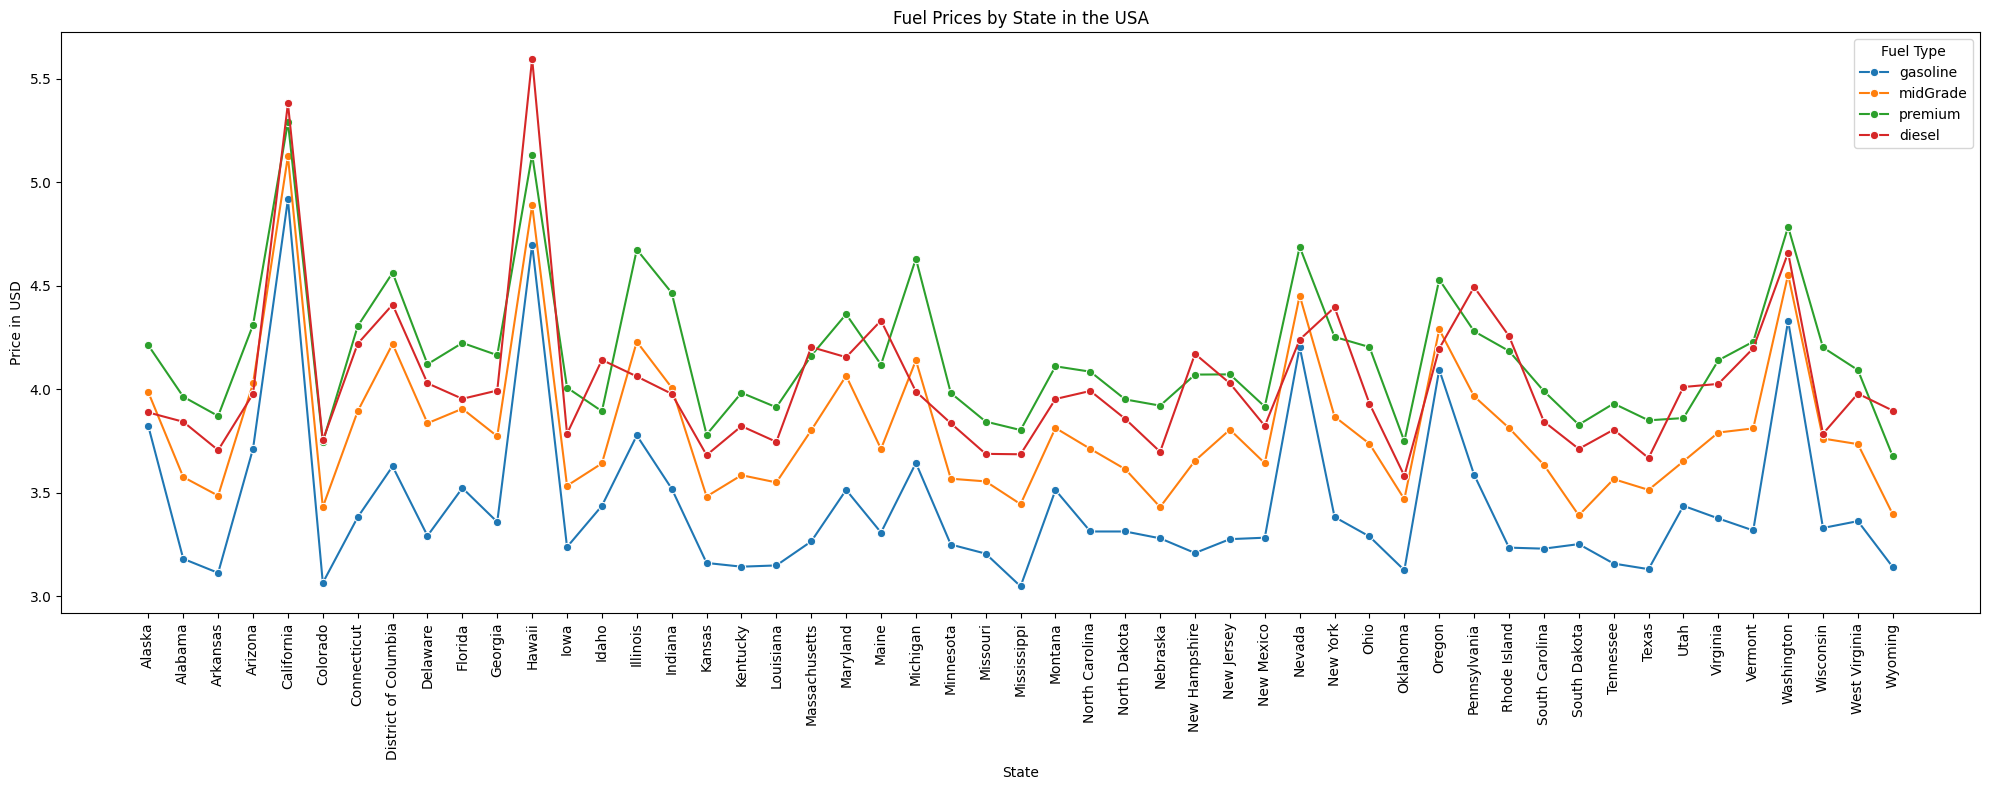

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_long, x='name', y='Price', hue='Fuel Type', marker='o')
plt.xticks(rotation=90) # Rotar los nombres de los estados para mejor legibilidad
plt.xlabel('State')
plt.ylabel('Price in USD')
plt.title('Fuel Prices by State in the USA')
plt.legend(title='Fuel Type')

plt.tight_layout() # Ajusta automáticamente los parámetros
plt.show()

# Generalizando la conexión:

In [ ]:
def conexion_Gas(endpoint:str, token:str)-> pd.DataFrame :
  """
  SUMMARY:
  Esta funcion se conecta a Gas Prices API
  y devuelve los valores de la consulta
  ARG:
    endpoint(str) : el recurso disponible a consultar,
    token (str) : token generado por el usuario
  RETURN:
    DataFrame: Valores devueltos por la api
  """
  url_base = "https://api.collectapi.com/gasPrice"
  url_consult = os.path.join(url_base,f"{endpoint}")
  auth = {'authorization': f"apikey {token}"}
  response = requests.get(url_consult,headers=headers)
  content = json.loads(response.content)
  content = pd.DataFrame(content['result'])
  return content

In [ ]:
conexion_Gas("usaStateCode", token)

,name,code
0,Alaska,AK
1,Alabama,AL
2,Arkansas,AR
3,American Samoa,AS
4,Arizona,AZ
5,California,CA
6,Colorado,CO
7,Connecticut,CT
8,District of Columbia,DC
9,Delaware,DE


**Nota**: En la página donde extraje los datos de este ejercicio, la API de combustibles de Australia está incompleta y no me deja visualizar el contenido, por eso tomé la API de los estados de USA como referencia. Solo algunos de los demás endpoints presentan datos completos y estructuras definidas, por lo que la función conexion_Gas solo aplica en esos casos.